In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('car_evaluation.csv')

In [3]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [4]:
df.columns=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [5]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [6]:
df.shape

(1727, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [9]:
cols = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

for col in cols:
    print(df[col].value_counts())

high     432
low      432
med      432
vhigh    431
Name: buying, dtype: int64
high     432
low      432
med      432
vhigh    431
Name: maint, dtype: int64
4        432
3        432
5more    432
2        431
Name: doors, dtype: int64
4       576
more    576
2       575
Name: persons, dtype: int64
big      576
med      576
small    575
Name: lug_boot, dtype: int64
high    576
med     576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [10]:
df['class'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [11]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [12]:
x=df.drop(['class'],axis=1)
y=df['class']

In [15]:
x.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,med
1,vhigh,vhigh,2,2,small,high
2,vhigh,vhigh,2,2,med,low
3,vhigh,vhigh,2,2,med,med
4,vhigh,vhigh,2,2,med,high


In [16]:
y.head()

0    unacc
1    unacc
2    unacc
3    unacc
4    unacc
Name: class, dtype: object

In [40]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 40)

In [41]:
xtrain.head()

,buying,maint,doors,persons,lug_boot,safety
1302,low,vhigh,2,2,big,med
1647,low,low,3,2,small,med
498,high,vhigh,4,4,med,med
739,high,med,5more,4,small,high
899,med,vhigh,3,4,small,low


In [42]:
xtrain.shape

(1208, 6)

In [43]:
xtest.shape

(519, 6)

In [44]:
import category_encoders as ce

In [45]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

In [46]:
xtrain=encoder.fit_transform(xtrain)
xtest=encoder.transform(xtest)

In [48]:
xtrain.head()

,buying,maint,doors,persons,lug_boot,safety
1302,1,1,1,1,1,1
1647,1,2,2,1,2,1
498,2,1,3,2,3,1
739,2,3,4,2,2,2
899,3,1,2,2,2,3


In [49]:
xtest.head()

,buying,maint,doors,persons,lug_boot,safety
622,2,4,4,1,2,2
360,4,2,2,2,2,1
1166,3,3,4,1,1,3
1673,1,2,3,1,2,3
1206,3,2,1,3,2,1


In [50]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
gini_model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

gini_model.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [54]:
y_predg=gini_model.predict(xtest)

In [55]:
from sklearn.metrics import accuracy_score
print('Model accuracy score (gini index): {0:0.4f}'. format(accuracy_score(ytest, y_predg)))

Model accuracy score (gini index): 0.8170


In [62]:
y_train_predg=gini_model.predict(xtrain)

In [63]:
print('Training set score: {:.4f}'.format(gini_model.score(xtrain, y_train_predg)))
print('Test set score: {:.4f}'.format(gini_model.score(xtest, ytest)))

Training set score: 1.0000
Test set score: 0.8170


[Text(267.84000000000003, 380.52, 'X[3] <= 1.5\ngini = 0.468\nsamples = 1208\nvalue = [274, 51, 834, 49]'),
 Text(133.92000000000002, 271.8, 'gini = 0.0\nsamples = 388\nvalue = [0, 0, 388, 0]'),
 Text(401.76000000000005, 271.8, 'X[5] <= 2.5\ngini = 0.585\nsamples = 820\nvalue = [274, 51, 446, 49]'),
 Text(267.84000000000003, 163.07999999999998, 'X[0] <= 3.5\ngini = 0.634\nsamples = 559\nvalue = [274, 51, 185, 49]'),
 Text(133.92000000000002, 54.360000000000014, 'gini = 0.631\nsamples = 417\nvalue = [225, 51, 92, 49]'),
 Text(401.76000000000005, 54.360000000000014, 'gini = 0.452\nsamples = 142\nvalue = [49, 0, 93, 0]'),
 Text(535.6800000000001, 163.07999999999998, 'gini = 0.0\nsamples = 261\nvalue = [0, 0, 261, 0]')]

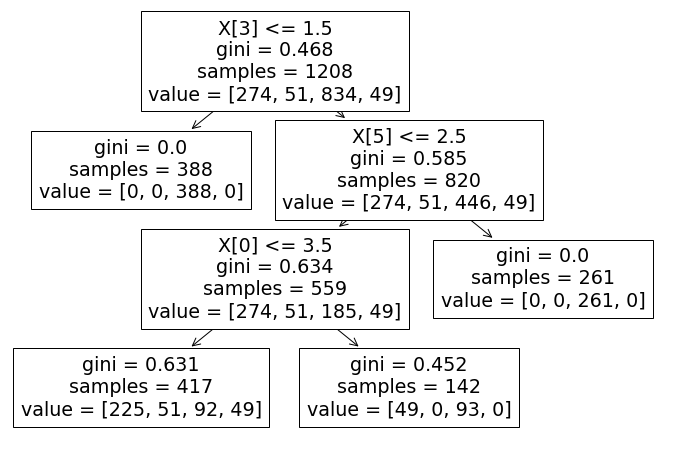

In [57]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(gini_model.fit(xtrain, ytrain)) 

In [59]:
entropy_model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
entropy_model.fit(xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [60]:
y_preden=entropy_model.predict(xtest)

In [61]:
print('Model accuracy score (entropy): {0:0.4f}'. format(accuracy_score(ytest, y_preden)))

Model accuracy score (entropy): 0.8170


In [64]:
y_train_preden=entropy_model.predict(xtrain)

In [67]:
print('Model accuracy score (entropy): {0:0.4f}'. format(accuracy_score(ytrain, y_train_preden)))

Model accuracy score (entropy): 0.8005


[Text(267.84000000000003, 380.52, 'X[3] <= 1.5\nentropy = 1.235\nsamples = 1208\nvalue = [274, 51, 834, 49]'),
 Text(133.92000000000002, 271.8, 'entropy = 0.0\nsamples = 388\nvalue = [0, 0, 388, 0]'),
 Text(401.76000000000005, 271.8, 'X[5] <= 2.5\nentropy = 1.498\nsamples = 820\nvalue = [274, 51, 446, 49]'),
 Text(267.84000000000003, 163.07999999999998, 'X[0] <= 3.5\nentropy = 1.655\nsamples = 559\nvalue = [274, 51, 185, 49]'),
 Text(133.92000000000002, 54.360000000000014, 'entropy = 1.695\nsamples = 417\nvalue = [225, 51, 92, 49]'),
 Text(401.76000000000005, 54.360000000000014, 'entropy = 0.93\nsamples = 142\nvalue = [49, 0, 93, 0]'),
 Text(535.6800000000001, 163.07999999999998, 'entropy = 0.0\nsamples = 261\nvalue = [0, 0, 261, 0]')]

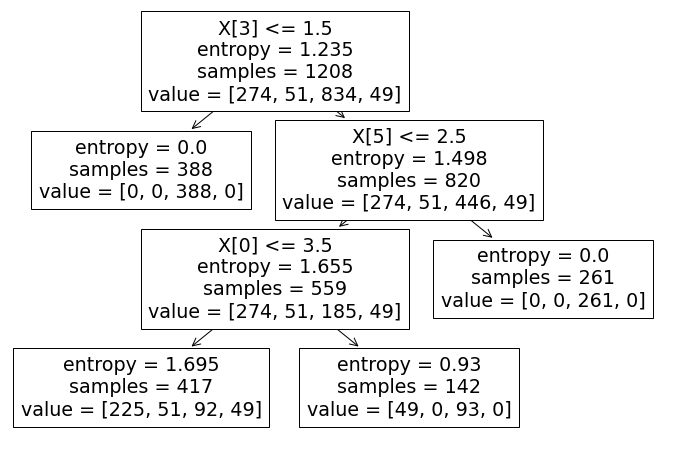

In [68]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(entropy_model.fit(xtrain, ytrain)) 

In [69]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(ytest, y_preden)
print('Confusion matrix\n', conf_mat)

Confusion matrix
 [[ 87   0  23   0]
 [ 18   0   0   0]
 [ 38   0 337   0]
 [ 16   0   0   0]]


In [70]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_preden))

              precision    recall  f1-score   support

         acc       0.55      0.79      0.65       110
        good       0.00      0.00      0.00        18
       unacc       0.94      0.90      0.92       375
       vgood       0.00      0.00      0.00        16

    accuracy                           0.82       519
   macro avg       0.37      0.42      0.39       519
weighted avg       0.79      0.82      0.80       519



C:\Users\nisha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nisha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nisha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
